## Env

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lake = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")
# lake = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
lake.reset()

def make_dist_map(env):
    n = np.sqrt(env.observation_space.n)
    X, Y = np.meshgrid(np.arange(n,0,-1)-1, np.arange(n,0,-1)-1)
    return (X + Y).ravel()

dist_map = make_dist_map(lake)
dist_map

array([6., 5., 4., 3., 5., 4., 3., 2., 4., 3., 2., 1., 3., 2., 1., 0.])

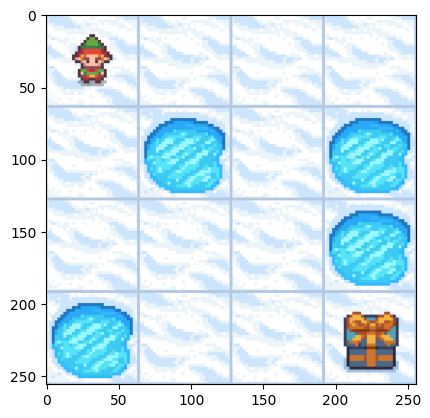

In [3]:
obs = lake.render()
plt.imshow(obs)

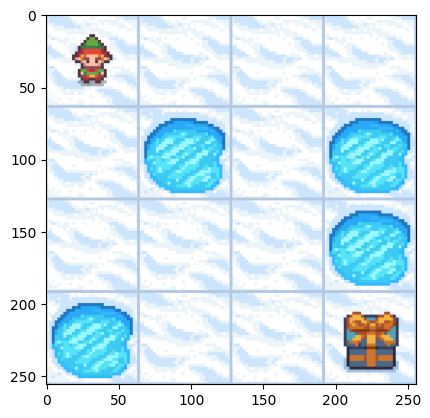

action: 2


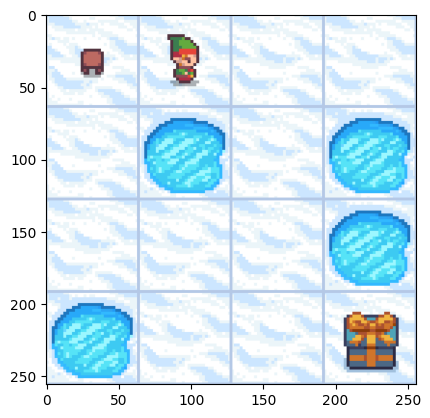

action: 2


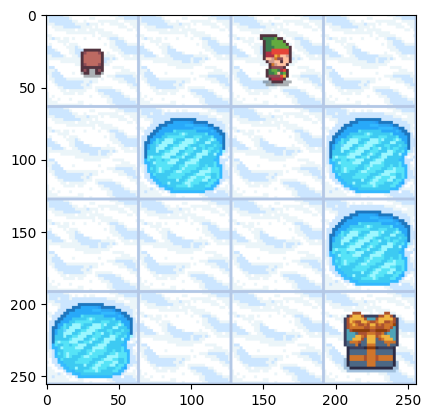

action: 2


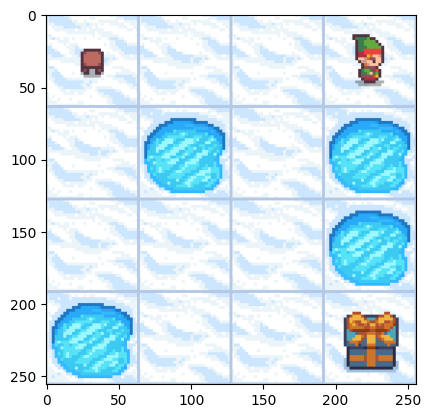

In [4]:
lake = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")
new_state, _ = lake.reset()
obs = lake.render()
plt.imshow(obs)
plt.show()

for i in range(100):
    action = lake.action_space.sample()
    state = new_state
    new_state, reward, done, _, info = lake.step(action)
    if new_state != state:
        if done:
            if reward==0:
                new_state = state
                lake.env.env.env.s = state
            else:
                obs = lake.render()
                plt.imshow(obs)
                plt.show()
                break
        else:
            if dist_map[new_state]<dist_map[state]:
                print(f'action: {action}')
                obs = lake.render()
                plt.imshow(obs)
                plt.show()
            else:
                new_state = state
                lake.env.env.env.s = state

In [5]:
done, state, new_state, reward

(False, 3, 3, 0.0)

In [6]:
obs.shape

(256, 256, 3)

In [8]:
lake.step(0)

(2, 0.0, False, True, {'prob': 1.0})

In [11]:
observations = []
for state in range(lake.observation_space.n):
    lake.env.env.env.s = state
    obs = lake.render()
    observations.append(obs)
    
len(observations)

16

In [21]:
np.isin(lake.env.env.env.desc.ravel() , ( b'S', b'F'))

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True, False])

In [22]:
np.argwhere(lake.env.env.env.desc.ravel() , ( b'S', b'F'))

TypeError: argwhere() takes 1 positional argument but 2 were given

In [24]:
observation_space = np.arange(lake.observation_space.n)
avaiable_space = observation_space[np.isin(lake.env.env.env.desc.ravel() , ( b'S', b'F'))]
avaiable_space

array([ 0,  1,  2,  3,  4,  6,  8,  9, 10, 13, 14])

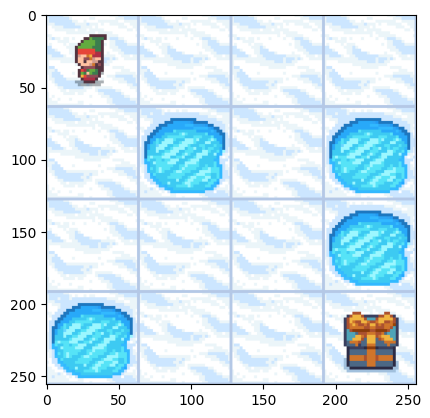

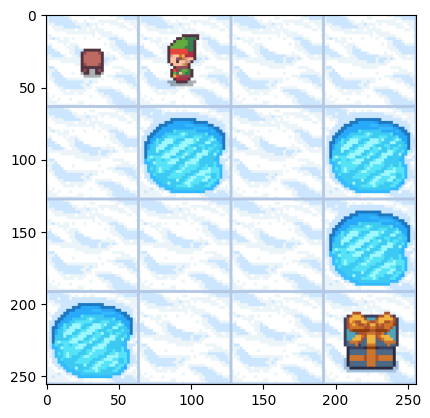

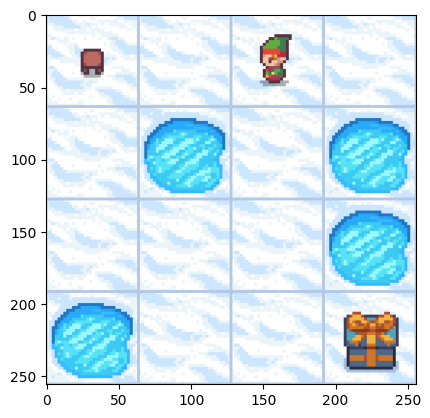

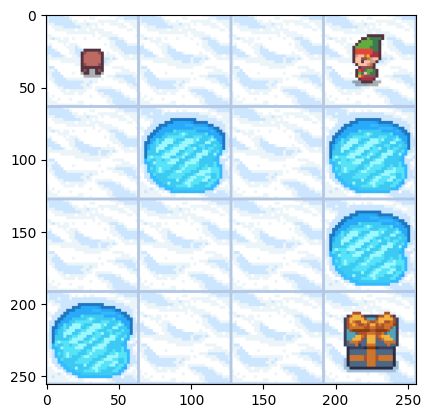

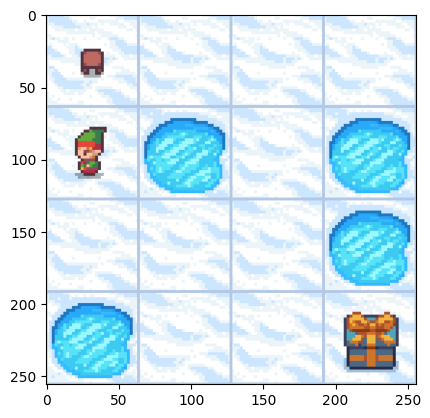

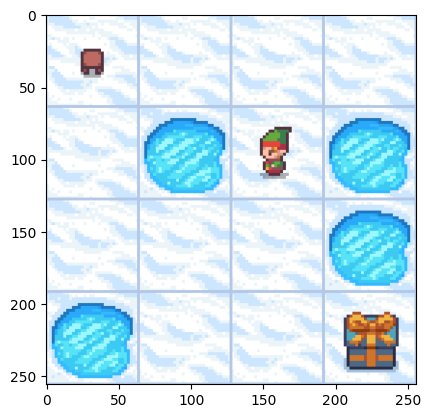

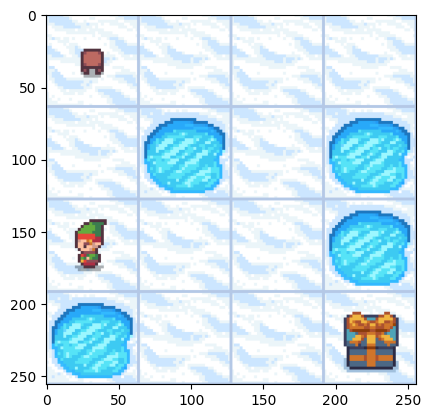

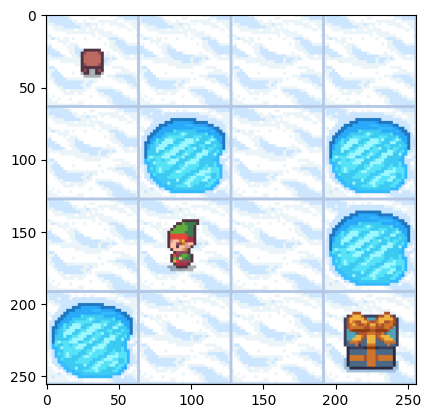

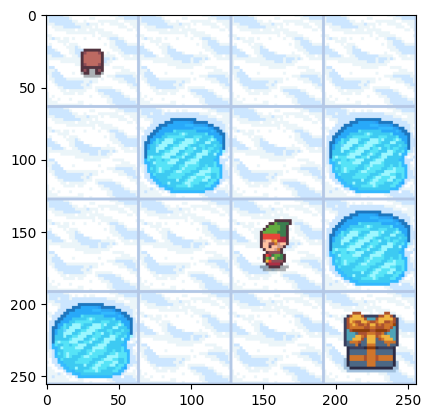

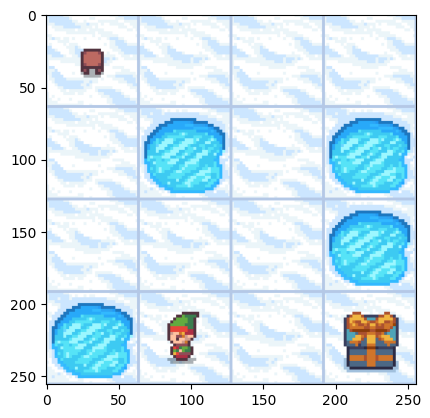

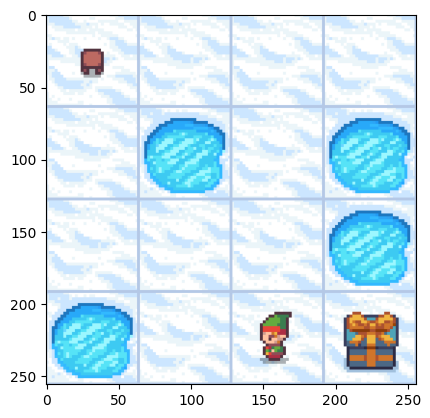

In [25]:
observations = []
for state in avaiable_space:
    lake.env.env.env.s = state
    obs = lake.render()
    observations.append(obs)
    

for obs in observations:
    plt.imshow(obs)
    plt.show()